In [77]:
#!pip install psycopg2
#import psycopg2 as ps
!pip install pandas
import pandas as pd
!pip install networkx
import networkx as nx
!pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
!pip install python-louvain
from community import community_louvain

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
drive_path = 'data/'

In [163]:
#df_response = pd.read_csv(drive_path+'CRORIS_df_response.csv', index_col=0) 
df_ustanova = pd.read_csv(drive_path+'CRORIS_df_ustanova.csv', index_col=0) 
df_osoba = pd.read_csv(drive_path+'CRORIS_df_osoba.csv', index_col=0) 
df_projekt = pd.read_csv(drive_path+'CRORIS_df_projekt.csv', index_col=0) 
df_financijer = pd.read_csv(drive_path+'CRORIS_df_financijer.csv', index_col=0) 
df_osoba_projekt = pd.read_csv(drive_path+'CRORIS_df_osoba_projekt.csv', index_col=0) 
df_projekt_financijer = pd.read_csv(drive_path+'CRORIS_df_projekt_financijer.csv', index_col=0) 
df_projekt_tip = pd.read_csv(drive_path+'CRORIS_df_projekt_tip.csv', index_col=0) 
df_projekt_ustanova = pd.read_csv(drive_path+'CRORIS_df_projekt_ustanova.csv', index_col=0) 

In [259]:
df_osoba_projekt

,osoba_id,projekt_id,pocetak,kraj,projektnaUloga,created
0,5511,1,01.09.2015,09.01.2019,voditelj,2022-08-18 16:01:13.287432
1,4292,2,01.09.2015,09.01.2019,suradnik,2022-08-18 16:01:15.157369
2,6894,2,01.09.2015,09.01.2019,suradnik,2022-08-18 16:01:15.157369
3,15606,2,01.09.2015,09.01.2019,voditelj,2022-08-18 16:01:15.157369
4,18553,2,01.09.2015,09.01.2019,suradnik,2022-08-18 16:01:15.157369
...,...,...,...,...,...,...
22500,34728,7749,01.12.2021,30.09.2022,voditelj,2022-08-18 19:55:35.400415
22501,39075,7749,01.12.2021,30.09.2022,suradnik,2022-08-18 19:55:35.400415
22502,30703,7750,01.12.2021,06.05.2022,voditelj,2022-08-18 19:55:37.212435
22503,21999,7752,01.07.2018,01.07.2020,voditelj na ustanovi,2022-08-18 19:55:40.667108


df = df_osoba_projekt.merge(df_osoba, left_on='osoba_id', right_on='id')
df = df.merge(df_ustanova, left_on='ustanovaId', right_on='id')
df = df.merge(df_projekt, left_on='projekt_id', right_on='id', suffixes=('_l', '_r'))
df = df.drop_duplicates(subset='osoba_id')
df = df[['osoba_id', 'projekt_id', 'ime', 'prezime', 'ustanovaId', 'mbu', 'ustanovaNaziv', 'aaiDomain', 'acro', 'title', 'currencyCode', 'totalCost']]

In [279]:
df = df_osoba_projekt.merge(df_osoba, left_on='osoba_id', right_on='id')
df = df.merge(df_projekt, left_on='projekt_id', right_on='id', suffixes=('_l', '_r'))
df = df[['osoba_id', 'projekt_id', 'ime', 'prezime', 'ustanovaId', 'acro', 'title', 'currencyCode', 'totalCost']]

In [280]:
df

,osoba_id,projekt_id,ime,prezime,ustanovaId,acro,title,currencyCode,totalCost
0,5511,1,Tihomir,Balog,66.0,SuMERA,Sirtuin3 kao posrednik mitohondrijske funkcije...,HRK,990253.00
1,5511,1710,Tihomir,Balog,66.0,NaN,Sustav citokroma P450 i pojava tumora u staren...,HRK,0.00
2,5511,5661,Tihomir,Balog,66.0,NaN,"Cedevita Healthy OTG – razvoj novog, zdravijeg...",HRK,18136999.12
3,5511,6303,Tihomir,Balog,66.0,NaN,Razvoj inovativnih formulacija kliničke prehrane,HRK,6103178.68
4,5529,6303,Ivanka,Jerić,66.0,NaN,Razvoj inovativnih formulacija kliničke prehrane,HRK,6103178.68
...,...,...,...,...,...,...,...,...,...
22472,27999,7733,Ines,Carović,90.0,NaN,Speech Error Database,HRK,18000.00
22473,28347,7733,Ana,Vidović Zorić,90.0,NaN,Speech Error Database,HRK,18000.00
22474,39908,7739,Maja,Hoić,NaN,NaN,k,USD,7.00
22475,40019,7741,Ivana,Karamatić,NaN,METABIOM,Metal-binding biomolecules and health disturba...,HRK,990738.00


In [1]:
G = nx.Graph()
len_df = len(df)

for index, row in df.iterrows():
  G.add_node(row[0], ime = row[2], prezime = row[3], ustanova = row[4])

  c=0 # broj veza
  for i, r in df.iterrows(): # iteriraj po retcima u petlji za svaki dodani novi node
    if r[1] == row[1]: # ako projekt iteriranog retka jednak pocetnom dodaj im edge
      if r[0] != row[0]: # izbjegni stvaranje edga za istu osobu (selfloop)
        G.add_edge(row[0], r[0], projekt = r[1], acro = r[5], title = r[6], currency = [7], cost = [8])
        c += 1 # uvecaj broj veza za 1
  progress = '{0:.3g}'.format((index/len_df)*100)
  print(str(progress)+'% - Index: '+str(index)+'; Osoba: '+str(row[0])+'; Projekt: '+str(row[1])+'; Broj veza: '+str(c))

NameError: name 'nx' is not defined

In [331]:
# backup u .csv i T objekt
T = G
df_G = nx.to_pandas_edgelist(G)
df_G.to_csv('CRORIS_df_G.csv')

In [413]:
# restore G from pandas edgelist from .csv
df_G_restore = pd.read_csv('CRORIS_df_G.csv', index_col=0) 
tmp = nx.from_pandas_edgelist(df_G_restore, 'source', 'target', ['projekt', 'acro', 'title', 'currency', 'cost']) 

In [480]:
df_G.query('source == 5511')

,source,target,cost,currency,projekt,title,acro
0,5511,5529,[8],[7],6303,Razvoj inovativnih formulacija kliničke prehrane,NaN
1,5511,8842,[8],[7],6303,Razvoj inovativnih formulacija kliničke prehrane,NaN
2,5511,188,[8],[7],6303,Razvoj inovativnih formulacija kliničke prehrane,NaN
3,5511,11701,[8],[7],6303,Razvoj inovativnih formulacija kliničke prehrane,NaN
4,5511,168,[8],[7],6303,Razvoj inovativnih formulacija kliničke prehrane,NaN
5,5511,2787,[8],[7],6303,Razvoj inovativnih formulacija kliničke prehrane,NaN
6,5511,2685,[8],[7],6303,Razvoj inovativnih formulacija kliničke prehrane,NaN
7,5511,7717,[8],[7],6303,Razvoj inovativnih formulacija kliničke prehrane,NaN


In [414]:
print ('Number of nodes: ', tmp.order())
print ('Number of edges: ', tmp.size())

Number of nodes:  8297
Number of edges:  66803


10174 nodes
66803 edges

In [481]:
list(G.edges(data=True))

[(5511,
  5529,
  {'projekt': 6303,
   'acro': nan,
   'title': 'Razvoj inovativnih formulacija kliničke prehrane',
   'currency': [7],
   'cost': [8]}),
 (5511,
  8842,
  {'projekt': 6303,
   'acro': nan,
   'title': 'Razvoj inovativnih formulacija kliničke prehrane',
   'currency': [7],
   'cost': [8]}),
 (5511,
  188,
  {'projekt': 6303,
   'acro': nan,
   'title': 'Razvoj inovativnih formulacija kliničke prehrane',
   'currency': [7],
   'cost': [8]}),
 (5511,
  11701,
  {'projekt': 6303,
   'acro': nan,
   'title': 'Razvoj inovativnih formulacija kliničke prehrane',
   'currency': [7],
   'cost': [8]}),
 (5511,
  168,
  {'projekt': 6303,
   'acro': nan,
   'title': 'Razvoj inovativnih formulacija kliničke prehrane',
   'currency': [7],
   'cost': [8]}),
 (5511,
  2787,
  {'projekt': 6303,
   'acro': nan,
   'title': 'Razvoj inovativnih formulacija kliničke prehrane',
   'currency': [7],
   'cost': [8]}),
 (5511,
  2685,
  {'projekt': 6303,
   'acro': nan,
   'title': 'Razvoj inova

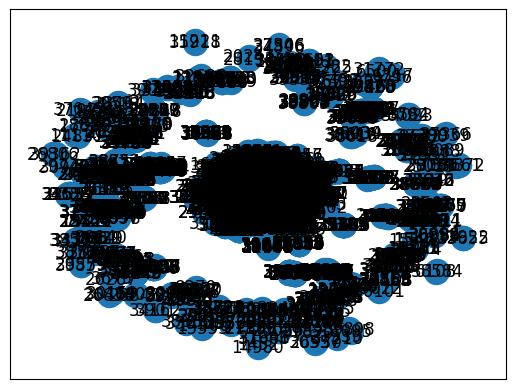

In [387]:
nx.draw_networkx(G)
plt.show()

In [449]:
centered = nx.Graph(nx.ego_graph(G, 38162, radius = 2)) # 38162 nikola, 10389 mile, 7101 ALONE

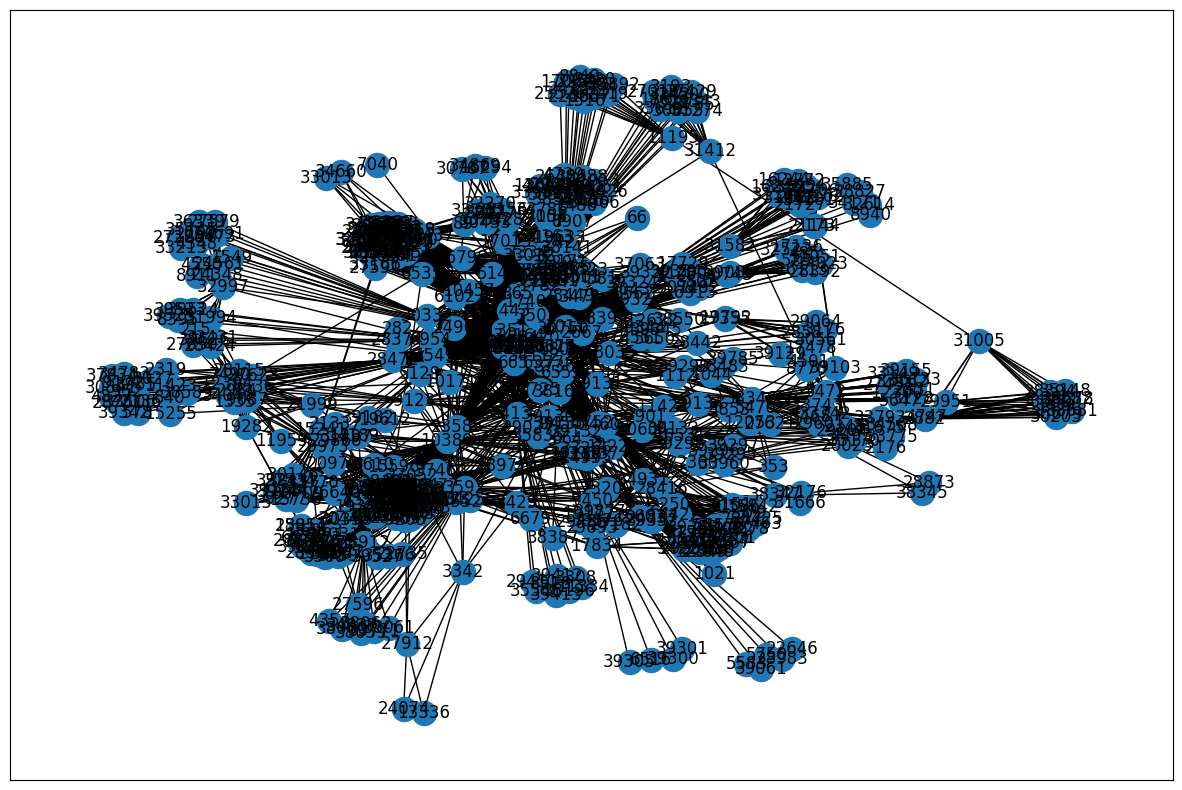

In [450]:
plt.figure(2,figsize=(15,10))
nx.draw_networkx(centered)
plt.show()

In [483]:
centrality = nx.degree_centrality(centered)
btwncnt = nx.betweenness_centrality(centered)
print('CENTR', centrality, 'BTWC', btwncnt)

CENTR {6151: 0.026936026936026935, 22542: 0.02356902356902357, 26640: 0.04208754208754208, 30743: 0.03535353535353535, 4121: 0.09427609427609428, 24602: 0.13804713804713803, 30748: 0.021885521885521883, 30750: 0.09764309764309764, 4126: 0.15488215488215487, 2089: 0.025252525252525252, 26666: 0.11616161616161616, 30767: 0.0101010101010101, 34869: 0.0101010101010101, 30775: 0.07912457912457913, 66: 0.0101010101010101, 38987: 0.11447811447811447, 2136: 0.021885521885521883, 28761: 0.021885521885521883, 89: 0.011784511784511785, 4189: 0.011784511784511785, 4201: 0.09427609427609428, 12394: 0.0202020202020202, 34931: 0.025252525252525252, 32883: 0.09427609427609428, 22646: 0.006734006734006734, 30841: 0.021885521885521883, 2173: 0.026936026936026935, 2176: 0.0101010101010101, 6281: 0.09427609427609428, 6283: 0.09427609427609428, 16531: 0.03872053872053872, 10389: 0.2962962962962963, 39061: 0.00505050505050505, 6297: 0.050505050505050504, 28827: 0.008417508417508417, 18590: 0.126262626262626

In [468]:
# Uses Louvain algorithm - References large networks. J. Stat. Mech 10008, 1-12(2008).
partition = community_louvain.best_partition(GRAPH)
#values = [partition.get(node) for node in centered.nodes()]

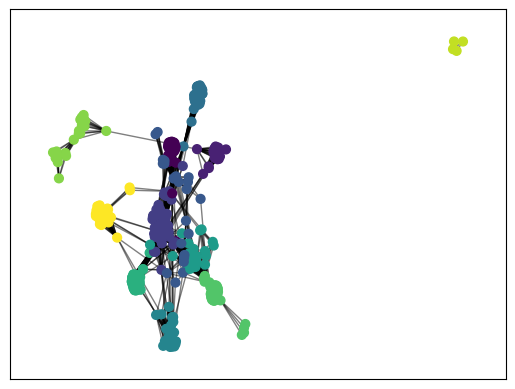

In [469]:
GRAPH = Gt
# draw the graph
pos = nx.spring_layout(GRAPH)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(GRAPH, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(GRAPH, pos, alpha=0.5)
plt.show()

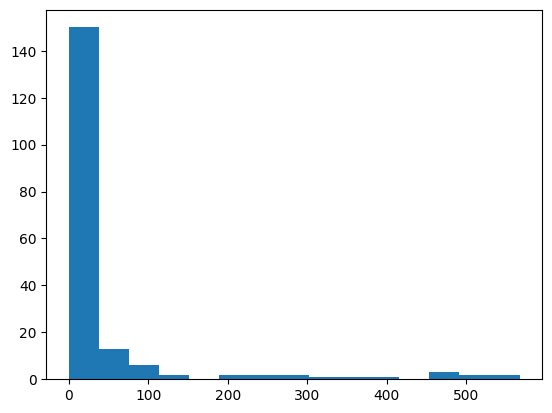

In [470]:
# distribution of the degree
plt.figure(2)
d = nx.degree_histogram(G)
plt.hist(d,bins=15)
plt.show()

In [455]:
def trim_nodes(G,d):
    """ returns a copy of G without 
     the nodes with a degree less than d """
    Gt = G.copy()
    dn = nx.degree(Gt)

    remove = [node for node,degree in dict(Gt.degree()).items() if dn[node] <= d]

    Gt.remove_nodes_from(remove)
    return Gt

In [471]:
Gt = trim_nodes(G,50)
print ('Number of nodes: ', Gt.order())
print ('Number of edges: ', Gt.size())

Number of nodes:  595
Number of edges:  8987


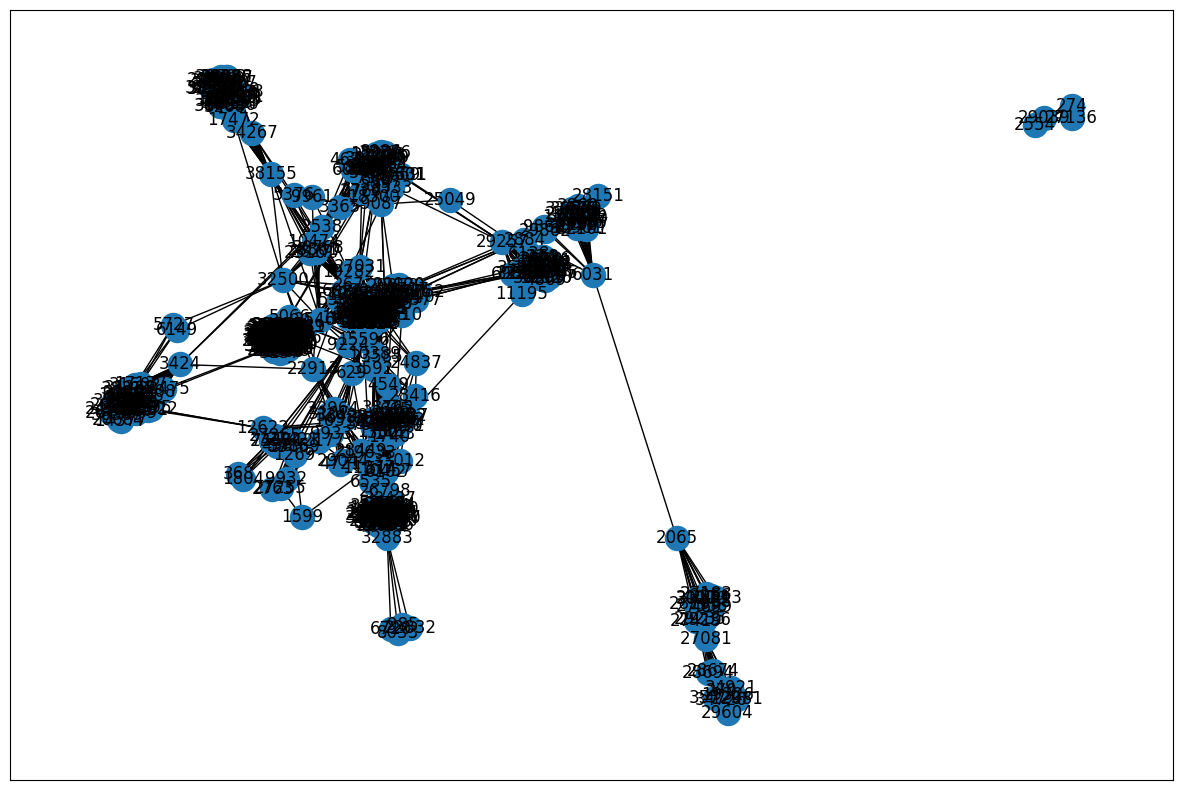

In [464]:
# drawing the network without
# nodes with degree less than d
plt.figure(2,figsize=(15,10))
nx.draw_networkx(Gt)
plt.show()

In [322]:
dendo = community_louvain.generate_dendrogram(centered)
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

for level in range(len(dendo) - 1) :
    print("partition at level", level, "is", community_louvain.partition_at_level(dendo, level))

partition at level 0 is {6151: 19, 22542: 1, 26640: 30, 30743: 13, 4121: 24, 24602: 19, 30748: 13, 30750: 25, 4126: 30, 2089: 17, 26666: 30, 30767: 20, 34869: 20, 30775: 25, 66: 10, 38987: 30, 2136: 21, 28761: 21, 89: 20, 4189: 5, 4201: 24, 12394: 8, 34931: 9, 32883: 24, 22646: 26, 30841: 21, 2173: 17, 2176: 27, 6281: 24, 6283: 24, 16531: 18, 10389: 30, 39061: 26, 6297: 7, 28827: 34, 18590: 30, 39072: 42, 39073: 42, 162: 25, 39074: 42, 14500: 22, 26798: 24, 28854: 42, 28855: 42, 188: 22, 39101: 17, 39102: 17, 39103: 39, 32960: 42, 39106: 30, 37063: 10, 28873: 16, 8395: 35, 22735: 28, 208: 30, 215: 8, 39128: 25, 39129: 25, 10457: 24, 39130: 41, 39132: 18, 39131: 41, 39133: 27, 39134: 38, 39136: 18, 39137: 18, 39135: 41, 32997: 36, 6377: 25, 18671: 1, 28912: 42, 28913: 30, 28914: 30, 39155: 38, 33012: 10, 33013: 24, 39158: 37, 33015: 30, 248: 30, 252: 24, 4348: 36, 28926: 7, 4352: 30, 28930: 7, 24837: 19, 4357: 2, 4359: 30, 6408: 30, 6409: 30, 267: 30, 39182: 43, 2319: 29, 18707: 30, 282

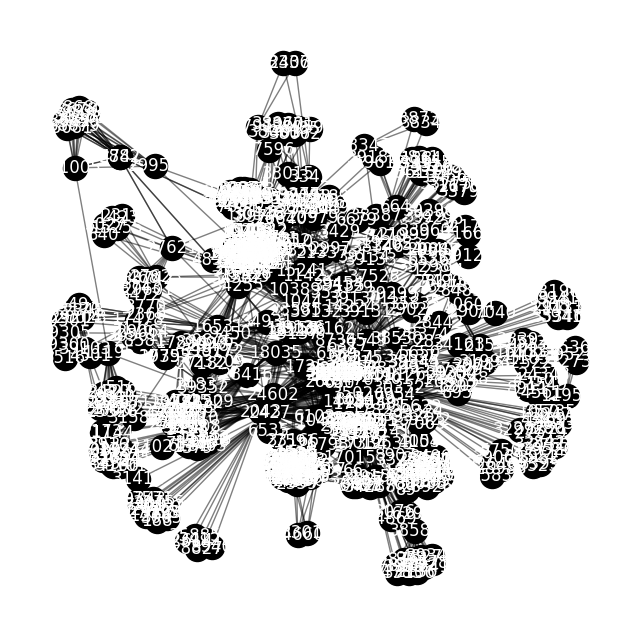

In [323]:
K = centered
pos = nx.fruchterman_reingold_layout(K);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(K, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(K, pos, alpha=0.500);
nx.draw_networkx_labels(K, pos, font_color="white");
plt.show();

In [324]:
# https://notebook.community/eflegara/NetStruc/6.%20Community%20Detection
import operator
## For Hierarchical Clustering
from scipy.cluster import hierarchy
from scipy.spatial import distance
    
#order the dictionary by value, which is the edge betweeness of two nodes
ebet = nx.edge_betweenness_centrality(K)
sorted_ebet = sorted(ebet.items(), key=operator.itemgetter(1), reverse=True)
sorted_ebet[0:5]

[((29951, 38162), 0.02215962764434843),
 ((10389, 2427), 0.016342499066494435),
 ((10389, 514), 0.01540660430479847),
 ((10389, 10457), 0.010300911046312903),
 ((10389, 2043), 0.009505618980498332)]

https://towardsdatascience.com/louvains-algorithm-for-community-detection-in-python-95ff7f675306

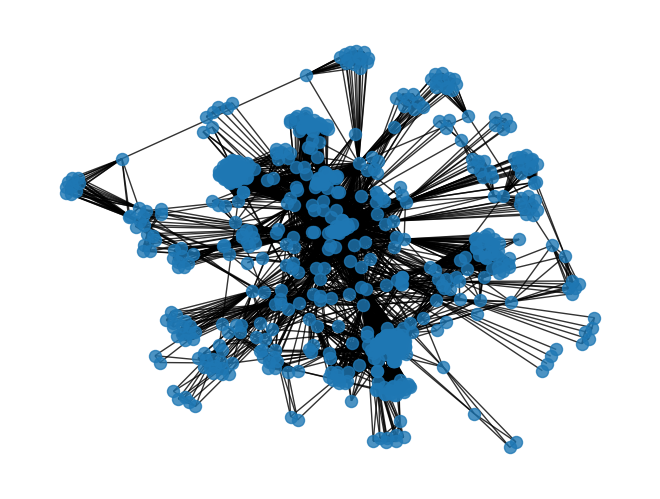

In [491]:
pos = nx.spring_layout(centered)
nx.draw(centered, pos, node_size = 75, alpha = 0.8)
remove = [node for node,degree in dict(G.degree()).items() if degree > 10]
plt.show()

In [492]:
remove = [node for node,degree in dict(G.degree()).items() if degree == 0]
remove
TST = G
TST.remove_nodes_from(remove)
list(TST.edges(data=True))

[(5511,
  5529,
  {'projekt': 6303,
   'acro': nan,
   'title': 'Razvoj inovativnih formulacija kliničke prehrane',
   'currency': [7],
   'cost': [8]}),
 (5511,
  8842,
  {'projekt': 6303,
   'acro': nan,
   'title': 'Razvoj inovativnih formulacija kliničke prehrane',
   'currency': [7],
   'cost': [8]}),
 (5511,
  188,
  {'projekt': 6303,
   'acro': nan,
   'title': 'Razvoj inovativnih formulacija kliničke prehrane',
   'currency': [7],
   'cost': [8]}),
 (5511,
  11701,
  {'projekt': 6303,
   'acro': nan,
   'title': 'Razvoj inovativnih formulacija kliničke prehrane',
   'currency': [7],
   'cost': [8]}),
 (5511,
  168,
  {'projekt': 6303,
   'acro': nan,
   'title': 'Razvoj inovativnih formulacija kliničke prehrane',
   'currency': [7],
   'cost': [8]}),
 (5511,
  2787,
  {'projekt': 6303,
   'acro': nan,
   'title': 'Razvoj inovativnih formulacija kliničke prehrane',
   'currency': [7],
   'cost': [8]}),
 (5511,
  2685,
  {'projekt': 6303,
   'acro': nan,
   'title': 'Razvoj inova

In [494]:
print ('Number of nodes: ', TST.order())
print ('Number of edges: ', TST.size())

Number of nodes:  8297
Number of edges:  66803
